In [23]:
import pandas as pd
import glob
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [24]:
# I load 101 pages for testing
list_of_files=glob.glob('./cdips_dell_test/*.txt')
#each page is cleaned to be a huge string, by lnyx in bash. Put all the strings in a list
allwords=[]
for i in range(len(list_of_files)):
    file=open(list_of_files[i],'r')
    raw=file.read().strip('\n')
    allwords.append(raw)


In [25]:
#an example of the words from a page
print("Total number of files is {}".format(len(allwords)))
print("One example is")
print(allwords[6])

Total number of files is 499
One example is
 for hours only get tremendous savings up to off shop now dell o sign in click to chat or call us shop support community search financing live chat or call available contracts coupons join dell advantage rewards price match for work desktop and all in one pcs inspiron inspiron desktop ajax loader gif inspiron desktop series windows intel core for hours only get tremendous savings up to off shop now filter selections by reset operating system customize buy processor customize buy memory customize buy x page x nav x page compare viewing of next add to comparecompare selected inspiron desktop add to comparecompare selected inspiron desktop add to comparecompare selected inspiron desktop add to comparecompare selected inspiron desktop add to comparecompare selected inspiron desktop view details view details view details view details view details th generation intel core tm i processor windows home gb memory tb hard drive th generation intel core 

In [26]:
#load the stop words, and add word 'dell' to the list, show what is in the stop words.
stops=stopwords.words("english")
stops.append('dell')
stops

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

In [27]:
#load the bag_of_words method from sklearn, set the features to be 200, and get the word features 
#by calling the fit_transform method
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer='word',stop_words=stops, max_features= 200)
words_features = vectorizer.fit_transform(allwords)

In [28]:
#show the dimension of the words features, a 2D array, each row coresponds to each page.
# columns are the most popular words frequency 
words_features=words_features.toarray()
words_features.shape

(499, 200)

In [29]:
#show the feature words and their counts
key_words = vectorizer.get_feature_names()
words_count=np.sum(words_features,axis=0)

for tag, count in zip(key_words,words_count):
    print(tag, count)

ac 778
access 673
accessories 520
add 1539
ads 649
advantage 2446
apply 1481
atom 671
available 1305
back 3733
balance 579
battery 1411
bit 813
black 518
business 5622
buy 1171
call 769
card 1664
cart 1074
celeron 696
cell 931
certified 575
chat 1059
choose 1988
cloud 561
code 1338
com 599
community 1005
compliance 681
contact 520
core 3482
credit 2950
customer 632
customize 1177
data 1664
datasheets 567
day 1647
days 1301
dbc 548
ddr 664
depth 919
design 547
desktop 934
display 871
double 970
drive 2762
dual 1077
dvd 511
emails 650
emc 607
energy 573
english 899
environment 807
environmental 743
external 676
factor 683
features 705
financing 1682
fips 833
form 1296
free 2687
front 603
full 969
gb 4391
gen 865
generation 1168
get 3685
ghz 745
graphics 831
hard 1790
hardware 897
hd 1157
hdmi 578
height 1622
help 2160
high 514
home 1432
includes 817
information 570
inside 2957
inspiron 701
integrated 836
intel 6280
internal 608
itanium 652
keyboard 1029
kg 1103
laptop 634
latitude 968
lb

In [30]:
#initialize the kmeans clustering methods, and cluster the words_features to 5 classes 
#kmeans_clustering=KMeans(n_clusters=6,n_jobs=-1, random_state=14)
#prediction_clusters=kmeans_clustering.fit_predict(words_features)

In [49]:
# find the optimal number of clusters by plotting the .inertia_: 
#Sum of distances of samples to their closest cluster center.

distortions = []
prediction_clusters=[]
for i in range (1, 30):
    km_clustering=KMeans(n_clusters=i, 
                         n_jobs=-1, n_init=50, random_state=14)
    prediction_cluster = km_clustering.fit_predict(words_features)
    distortions.append(km_clustering.inertia_)
    prediction_clusters.append(prediction_cluster)


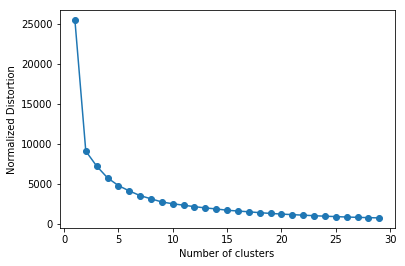

In [56]:
distortions=np.array(distortions)
plt.plot(range(1,30),distortions*(1/len(allwords)), marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Normalized Distortion')
#plt.yscale('log')
#plt.ylim(1e+5,1e+8)
plt.show()


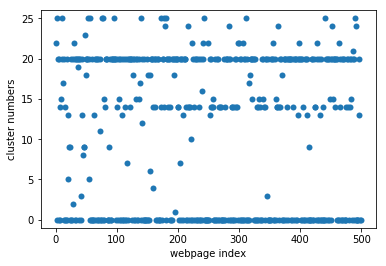

In [34]:
plt.scatter(range(1,len(prediction_clusters[25])+1),prediction_clusters[25],)
plt.ylim(-1,26)
plt.xlabel('webpage index')
plt.ylabel('cluster numbers')
plt.show()

In [84]:
tmp=prediction_clusters[25]
fileindex0=[]
fileindex20=[]
for i,j in enumerate(tmp):
    if j==0:
        fileindex0.append(i)
    if j==20:
        fileindex20.append(i)

In [91]:
cluster0=[list_of_files[x][-12:-6] for x in fileindex0]
cluster20=[list_of_files[x][-12:-6] for x in fileindex20]
print("cluster0 files {}".format(cluster0))

print("cluster20 files {}".format(cluster20))

cluster0 files ['000114', '000202', '000366', '000675', '000862', '000869', '000919', '001087', '001243', '001509', '001643', '001798', '002140', '002356', '003259', '003450', '003597', '003788', '003876', '003964', '004422', '004516', '004601', '004895', '004990', '005025', '005211', '005453', '005494', '005568', '005779', '006029', '006883', '007166', '007236', '007392', '007645', '007782', '008093', '008799', '008912', '009530', '009739', '010001', '010370', '010402', '010815', '011003', '011175', '011192', '011317', '011334', '011684', '012105', '012109', '014012', '014196', '014558', '014571', '014673', '014802', '015979', '016390', '016462', '016662', '017860', '018084', '018229', '018686', '018810', '018889', '019213', '019436', '019531', '019657', '020116', '020118', '020235', '020237', '020266', '020706', '020745', '020875', '020912', '021007', '021283', '021456', '022316', '022402', '022576', '022681', '022839', '023047', '023177', '023224', '023268', '023275', '023303', '023